### Actions
N(0), E(1), S(2), W(3)

### States
N(0), NE(1), E(2), SE(3), S(4), SW(5), W(6), NW(7)


### Rewards
1. +10 Eats Food
2. -0.1 Moves

In [4]:
from matplotlib import pyplot as plt
import matplotlib.animation
import random
import numpy as np
import json

In [40]:
WIDTH = 10
HEIGHT = 10

In [84]:
def get_possible_actions(current_pos):
   # N(0), E(1), S(2), W(3)

    # actions =[]
    # if current_pos[0] > 0:
    #     actions.append(0)
    # if current_pos[0] < HEIGHT-1:
    #     actions.append(2)
    # if current_pos[1] < WIDTH-1:
    #     actions.append(1)
    # if current_pos[1] > 0:
    #     actions.append(3)
   
    
    return [0,1,2,3]

def get_next_pos(current_pos, action):
    if(action == 0):
        return [current_pos[0] - 1,current_pos[1]] 
    elif (action == 2):
        return [current_pos[0] + 1,current_pos[1]] 
    elif (action == 1):
        return [current_pos[0],current_pos[1]+1]
    else:
        return [current_pos[0],current_pos[1]-1]


def get_state(current_pos, food_pos):
# NW(0), NW&EW(1), EW(2), EW&SW(3) SW(4),SW&WW(5) WW(6) WW&NW(7)
# N(0), NE(1), E(2), SE(3), S(4), SW(5), W(6), NW(7)
    state = [None,None]

    
    if current_pos[0]-1 == -1 and current_pos[1]+1 != WIDTH and current_pos[1]-1 != -1:
        state[0] = 0
    elif current_pos[0]-1 == -1 and current_pos[1]+1 == WIDTH:
        state[0] = 1
    elif current_pos[1]+1 == WIDTH and current_pos[0]+1 != HEIGHT and current_pos[0]-1 != -1: 
        state[0] = 2
    elif current_pos[1]+1 == WIDTH and current_pos[0]+1 == HEIGHT: 
        state[0] = 3 
    elif current_pos[0]+1 == HEIGHT and current_pos[1]+1 != WIDTH and current_pos[1]-1 != -1: 
        state[0] = 4
    elif current_pos[0]+1 == HEIGHT and current_pos[1]-1 == -1: 
        state[0] = 5
    elif current_pos[1]-1 == -1 and current_pos[0]+1 != HEIGHT and current_pos[0]-1 != -1: 
        state[0] = 6
    elif current_pos[0]-1 == -1 and current_pos[0]-1 == -1:
        state[0] = 7
         

    if current_pos[0] > food_pos[0] and current_pos[1] == food_pos[1]:
        state[1]=0
    elif current_pos[0] > food_pos[0] and current_pos[1] < food_pos[1]:
        state[1]=1
    elif current_pos[0] == food_pos[0] and current_pos[1] < food_pos[1]:
        state[1]=2
    elif current_pos[0] < food_pos[0] and current_pos[1] < food_pos[1]:
        state[1]=3
    elif current_pos[0] < food_pos[0] and current_pos[1] == food_pos[1]:
        state[1]=4
    elif current_pos[0] < food_pos[0] and current_pos[1] > food_pos[1]:
        state[1]=5
    elif current_pos[0] == food_pos[0] and current_pos[1] > food_pos[1]:
        state[1]=6
    elif current_pos[0] > food_pos[0] and current_pos[1] > food_pos[1]:
        state[1]=7
    else:
        state[1]=None

    return state 

def game_complete(current_pos):
    return current_pos[0] < 0 or current_pos[0] >= HEIGHT or current_pos[1] < 0 or current_pos[0] >= WIDTH

def set_food_pos(current_pos):
    food_pos = [random.randint(0, HEIGHT-1), random.randint(0, WIDTH-1)]
    while food_pos == current_pos:
        food_pos = [random.randint(0, HEIGHT-1), random.randint(0, WIDTH-1)]
    return food_pos

def evaluate_move(current_pos, food_pos):
    if current_pos == food_pos:
        return 100
    elif game_complete(current_pos):
        return -100
    else: 
        return 0.1


In [110]:
print(get_state([4,4], [5,3]))

[None, 5]


In [86]:
def generate_env_q_matrix(height, width):
    env = [[-0.1 for x in range(width)] for y in range(height)]
    
    # NW(0), EW(1), SW(2), WW(3)
    # N(0), NE(1),E(2), SE(3), S(4), SW(5), W(6), NW(7)
    q_matrix = [[[0,0,0,0] for x in range(8)] for y in range(8)]
    
    
    return env, q_matrix

In [87]:
# print(q_matrix)



In [136]:
discount = 0.9
learning_rate = 0.1
env, q_matrix = generate_env_q_matrix(HEIGHT, WIDTH)


for _ in range(10000):


    current_pos = [random.randint(0, HEIGHT-1), random.randint(0, WIDTH-1)]
    food_pos = set_food_pos(current_pos)
    i = 0

    while(not game_complete(current_pos)):
        # print(i)
        state = get_state(current_pos, food_pos)
       
        #     state = get_state(current_pos, food_pos)

        
        possible_actions = get_possible_actions(current_pos)
        action = random.choice(possible_actions)
        next_pos = get_next_pos(current_pos, action)
        reward = evaluate_move(next_pos, food_pos)
        # if reward == 100:
        #     print("aaa")

      
        if state[0] == None and state[1] == None:
            food_pos = set_food_pos(current_pos)
            state = get_state(current_pos, food_pos)
        
        if state[0] == None:
            q_matrix[random.randint(0,7)][state[1]][action] = q_matrix[random.randint(0,7)][state[1]][action]  + learning_rate * (reward + discount *  max(q_matrix[random.randint(0,7)][state[1]]) - q_matrix[random.randint(0,7)][state[1]][action])
        elif state[1] == None:
            food_pos = set_food_pos(current_pos)
            state = get_state(current_pos, food_pos)
            q_matrix[state[0]][random.randint(0,7)][action] = q_matrix[state[0]][random.randint(0,7)][action]  + learning_rate * (reward + discount *  max(q_matrix[state[0]][random.randint(0,7)]) - q_matrix[state[0]][random.randint(0,7)][action])
        else:
            q_matrix[state[0]][state[1]][action] = q_matrix[state[0]][state[1]][action]  + learning_rate * (reward + discount *  max(q_matrix[state[0]][state[1]]) - q_matrix[state[0]][state[1]][action])
        
        
            


        current_pos = next_pos
        i+= 1
        
    






[[155.99887531  28.38784814 155.13361708  21.58868524 138.50573218
   21.62884025  71.50406313  14.99121703]
 [144.12195998  28.19921074 156.76621947  21.89465104 134.74496993
   22.04170195  73.34907727  14.85315272]
 [154.58449787  33.05119197 157.5156214   22.86484393 138.74424411
   22.19543445  73.76721045  14.86129289]
 [146.45828143  30.55439246 157.96709374  23.20265578 138.40816063
   21.87119124  74.85448572  14.84414383]
 [145.03281885  35.00638927 165.95999153  23.40953206 137.42144582
   21.76446013  76.68414265  15.00475806]
 [146.90500782  28.21811654 163.5503983   23.20841588 140.0503325
   21.86519251  83.23632761  15.00101616]
 [154.69589006  27.37182611 156.45116124  23.40465441 137.64847935
   22.378483    74.93768005  15.01687212]
 [163.25923009  32.87926281 164.38725875  22.85346193 148.94376563
   22.05265341  71.8882157   15.15957578]]


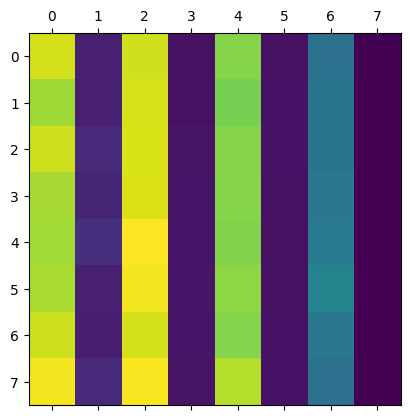

In [137]:
values = []
directions = []
for row in q_matrix:
    for column in row:
        values.append(column[np.argmax(column)])
        directions.append(np.argmax(column))
        
values = np.reshape(values,(8,8))
directions = np.reshape(directions,(8,8))

# print(json.dumps(q_matrix, indent = 2))
# print(directions)
print(values)
plt.matshow(values)

In [139]:
env, _ = generate_env_q_matrix (HEIGHT ,WIDTH)

current_pos = [9, 9]
env[current_pos[0]][current_pos[1]] = 50

food_pos = [9,0]
env[food_pos[0]][food_pos[1]] = 100



fig, ax = plt.subplots()
l = ax.imshow(env)

def move():
    global current_pos
    global food_pos
    
    
    state = get_state(current_pos, food_pos)
    

    if state[1] == None:
        env[food_pos[0]][food_pos[1]] = 0
        food_pos = set_food_pos(current_pos)
        env[food_pos[0]][food_pos[1]] = 100
        state = get_state(current_pos, food_pos)
        
    if state[0] == None:
        action = directions[random.randint(0,7)][state[1]]
    else: 
        action = directions[state[0]][state[1]]
    

    env[current_pos[0]][current_pos[1]] = 0
    next_pos =  get_next_pos(current_pos, action)
    if next_pos[0]<0 or next_pos[1]<0 or next_pos[0]>= HEIGHT or next_pos[1]>= WIDTH:
        pass
    else: 
        current_pos = next_pos

    env[current_pos[0]][current_pos[1]] = 50

def anim(i):
    l.set_data(env)
    move()


ani = matplotlib.animation.FuncAnimation(fig, anim, frames=40)


plt.close()
from IPython.display import HTML
HTML(ani.to_jshtml())


